<a href="https://colab.research.google.com/github/Zinga18018/Ipynb_Project_Snippets/blob/main/Simple_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,confusion_matrix,classification_report

In [3]:
# Input layer -> Forward -> First Layer -> Output Layer
torch.manual_seed(1)

In [6]:
class model(nn.Module):
  #4 Input layers -> Hidden Layers -> hidden layer h2 -> output layer -> Classification
  def __init__(self,in_features = 4 , h1 = 8 , h2 = 9 , out_features = 3):
    super().__init__() # Inheritence
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
      x = F.relu(self.fc1(x))#rectified linear unit
      x = F.relu(self.fc2(x))
      x = F.relu(self.out(x))

      return x


In [8]:
model = model()

In [12]:
df = pd.read_csv('Iris.csv')

In [13]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [18]:
df.shape

(150, 6)

In [20]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [29]:
#Changing the columns to integers
encoder = LabelEncoder()
encoded_species = encoder.fit_transform(df['Species'])
df['Species'] = encoded_species

In [30]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [55]:
x = df.drop(['Species','Id'],axis =1)
y = df['Species']

In [56]:
x = x.values
y = y.values

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [63]:
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)
#x gets float and y gets Long

In [64]:
# Set the criterion of the model to measure the error
Criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

In [70]:
from torch.autograd import backward
# Train our model , we use epochs  similar to iterations
epochs = 100
loses = []
for i in range(epochs):
  y_pred = model.forward(x_train)
  loss = Criterion(y_pred,y_train)
  loses.append(loss.detach().numpy())
  if i % 10 == 0:
    print(f'Epoch : {i} , Loss : {loss}')
  backward(loss)
  optimizer.step()
  optimizer.zero_grad()

Epoch : 0 , Loss : 0.06298757344484329
Epoch : 10 , Loss : 0.06003332883119583
Epoch : 20 , Loss : 0.058108117431402206
Epoch : 30 , Loss : 0.056727245450019836
Epoch : 40 , Loss : 0.055666666477918625
Epoch : 50 , Loss : 0.05481099709868431
Epoch : 60 , Loss : 0.0540955513715744
Epoch : 70 , Loss : 0.05348081886768341
Epoch : 80 , Loss : 0.05294135957956314
Epoch : 90 , Loss : 0.052460070699453354


In [71]:
print(loses)

[array(0.06298757, dtype=float32), array(0.06262179, dtype=float32), array(0.06227523, dtype=float32), array(0.06194566, dtype=float32), array(0.06163246, dtype=float32), array(0.06133398, dtype=float32), array(0.06104957, dtype=float32), array(0.06077807, dtype=float32), array(0.06051866, dtype=float32), array(0.06027067, dtype=float32), array(0.06003333, dtype=float32), array(0.05980571, dtype=float32), array(0.05958733, dtype=float32), array(0.05937753, dtype=float32), array(0.05917567, dtype=float32), array(0.05898147, dtype=float32), array(0.05879416, dtype=float32), array(0.05861369, dtype=float32), array(0.05843932, dtype=float32), array(0.05827094, dtype=float32), array(0.05810812, dtype=float32), array(0.05795055, dtype=float32), array(0.05779782, dtype=float32), array(0.05764993, dtype=float32), array(0.05750646, dtype=float32), array(0.05736722, dtype=float32), array(0.05723204, dtype=float32), array(0.05710057, dtype=float32), array(0.05697275, dtype=float32), array(0.05684

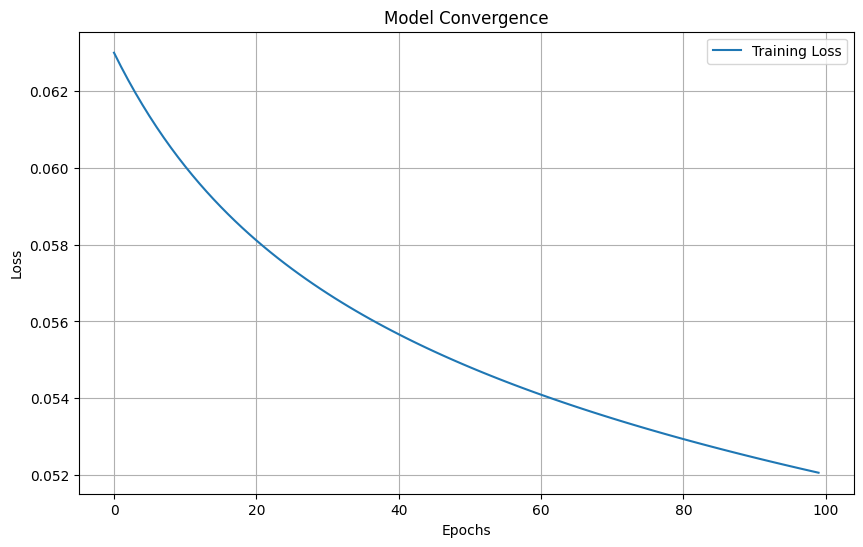

In [72]:
import matplotlib.pyplot as plt

# After your training loop finishes:
plt.figure(figsize=(10, 6))
plt.plot(loses, label='Training Loss')
plt.title('Model Convergence')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
model.eval()

model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [79]:
with torch.no_grad():
  y_eval = model.forward(x_test)
  loss = Criterion(y_eval,y_test)
  print(loss)
cm = confusion_matrix(y_test,y_eval.argmax(dim=1))
print(cm)

tensor(0.0350)
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
